In [1]:
# importing the modules 
import os
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from time import time
import dask.dataframe as dd
import pickle
from tqdm import tqdm
from IPython.display import display 
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# credits : https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-ga-customer-revenue
def load_df(csv_path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

    df = pd.read_csv(csv_path,
                     converters={
                         column: json.loads for column in JSON_COLUMNS},
                     dtype={'fullVisitorId': 'str'},
                     nrows=nrows)

    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        
        column_as_df.columns = ["{0}.{1}".format(column, subcolumn) for subcolumn in column_as_df.columns] 
        
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True) 
        
    print("Loaded {0}. Shape: {1}".format(os.path.basename(csv_path), df.shape))
    
    return df

In [3]:
%%time
test_df  = load_df("test_v2.csv")

Loaded test_v2.csv. Shape: (401589, 59)
CPU times: user 1min 41s, sys: 10 s, total: 1min 51s
Wall time: 2min 44s


In [4]:
%%time
train_df = load_df("train_v2.csv")

Loaded train_v2.csv. Shape: (1708337, 60)
CPU times: user 6min 17s, sys: 38.9 s, total: 6min 56s
Wall time: 9min 51s


In [9]:
# checking dataframe sizes
print(f'train shape: {train_df.shape} \ntest shape: {test_df.shape}')

train shape: (1708337, 60) 
test shape: (401589, 59)


## Saving loaded dataframes in a pickle file

In [28]:
with open('test_v2.pickle','wb') as f:
    pickle.dump(test_df, f)

In [29]:
with open('train_v2.pickle','wb') as f:
    pickle.dump(train_df, f)

## Load dataframes from pickle files

In [4]:
start = time()
with open('train_v2.pickle','rb') as f:
    train_df = pickle.load(f)

with open('test_v2.pickle','rb') as f:
    test_df = pickle.load(f)
end = time()
print(f'Time for loading pickle files: {end-start} secs')

Time for loading pickle files: 345.25351881980896 secs


In [8]:
# checking loaded pickle files
print(f'train shape: {train_df.shape} \ntest shape: {test_df.shape}')

train shape: (1708337, 60) 
test shape: (401589, 59)


In [10]:
# checking loaded pickle files
train_df.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,...,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,...,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,1508169851,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# checking loaded pickle files
test_df.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.medium,trafficSource.keyword,trafficSource.adContent,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,7460955084541987166,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",Not Socially Engaged,1526099341,2,1526099341,Chrome,...,organic,(not provided),(not set),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,460252456180441002,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,1526064483,166,1526064483,Chrome,...,(none),(not set),(not set),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3461808543879602873,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1526067157,2,1526067157,Chrome,...,organic,(not provided),(not set),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
3,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,975129477712150630,"[{'hitNumber': '1', 'time': '0', 'hour': '23',...",Not Socially Engaged,1526107551,4,1526107551,Chrome,...,(none),(not set),(not set),True,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
4,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,8381672768065729990,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1526060254,1,1526060254,Internet Explorer,...,organic,(not provided),(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN


* creating a smaller df to test code faster because original train df is very large in size

In [6]:
train_subset = train_df[:10000].copy(deep=True)
train_subset.head(2)

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,Windows,...,(not set),google,organic,water bottle,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,Chrome OS,...,(not set),sites.google.com,referral,NaN,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN


# 1. Data Preprocessing

### 1.1 First we'll check how many columns multiple values, only those columns would be useful as a feature. Columns having single values throughout will provide no information for predicting the target variable.

In [48]:
# nunique() gives the count of unqiues values of each column
train_subset.nunique()

channelGrouping                                         7
customDimensions                                        6
date                                                    4
fullVisitorId                                        9210
hits                                                 9809
socialEngagementType                                    1
visitId                                              9812
visitNumber                                            73
visitStartTime                                       9813
device.browser                                         23
device.browserVersion                                   1
device.browserSize                                      1
device.operatingSystem                                 15
device.operatingSystemVersion                           1
device.isMobile                                         2
device.mobileDeviceBranding                             1
device.mobileDeviceModel                                1
device.mobileI

In [51]:
start = time()
# make a list of all column names
column_list = train_df.columns.to_list()
for column in column_list:
    # dropping columns having single value across all rows
    if train_df[column].nunique() == 1:
        del train_df[column]

end = time()

print(f'Time taken: {(end-start)/60} mins')
print(f'After dropping single valued columns df size is: {train_df.shape}')
train_df.head(2)

Time taken: 1.0390421271324157 mins
After dropping single valued columns df size is: (1708337, 36)


,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,Windows,...,(not set),google,organic,water bottle,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,Chrome OS,...,(not set),sites.google.com,referral,NaN,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN


In [54]:
%%time
train_df.nunique()

CPU times: user 1min 2s, sys: 197 ms, total: 1min 2s
Wall time: 1min 2s


channelGrouping                                       8
customDimensions                                      6
date                                                638
fullVisitorId                                   1323730
hits                                            1338924
visitId                                         1665802
visitNumber                                         457
visitStartTime                                  1667423
device.browser                                      129
device.operatingSystem                               24
device.isMobile                                       2
device.deviceCategory                                 3
geoNetwork.continent                                  6
geoNetwork.subContinent                              23
geoNetwork.country                                  228
geoNetwork.region                                   483
geoNetwork.metro                                    123
geoNetwork.city                                 

### 2. Find columns having missing values

In [56]:
train_df.shape

(1708337, 36)

In [55]:
train_subset.head(2)

,channelGrouping,customDimensions,date,fullVisitorId,hits,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",1508198450,1,1508198450,Firefox,Windows,...,(not set),google,organic,water bottle,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",1508176307,6,1508176307,Chrome,Chrome OS,...,(not set),sites.google.com,referral,NaN,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN


In [3]:
def missing_values(dataframe):
    ''' Calculates the no of missing values and their percentage for each column of the given dataframe and 
    displays it in a dataframe format.'''
    
    # isnull() : finding the missing values 
    # sum()    : taking the sum across all rows 
    # sort_values(ascending = False) : sorting in descending order
    total = dataframe.isnull().sum().sort_values(ascending = False) # total is the number of rows missing
    
    # percentage of missing values
    missing_values_series = total / len(dataframe) * 100
    # creating a dataframe to save this information
    missing_values_df = pd.concat([total, missing_values_series], axis=1, keys=['no of rows missing', 'percentage of data missing'])
    # display only columns having the missing values
    display(missing_values_df[missing_values_df['no of rows missing']!=0])
    

In [138]:
%%time
missing_values(train_df)

,no of rows missing,percentage of data missing
totals.transactionRevenue,1689823,98.916256
totals.totalTransactionRevenue,1689823,98.916256
totals.transactions,1689778,98.913622
trafficSource.adContent,1643600,96.210525
trafficSource.adwordsClickInfo.adNetworkType,1633063,95.593727
trafficSource.adwordsClickInfo.slot,1633063,95.593727
trafficSource.adwordsClickInfo.page,1633063,95.593727
trafficSource.adwordsClickInfo.gclId,1632914,95.585005
trafficSource.referralPath,1142073,66.852910
trafficSource.keyword,1052780,61.626014


CPU times: user 2.81 s, sys: 506 ms, total: 3.31 s
Wall time: 3.31 s


### Imputing the missing values 

* **totals.transactionRevenue:** Revenue generated in a session

In [173]:
%%time
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.transactionRevenue'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.transactionRevenue'].fillna(0, inplace=True)
test_df['totals.transactionRevenue'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.transactionRevenue'].isnull().sum()}")

Count of nan values:-
Before Imputation:1689823
After Imputation:0
CPU times: user 261 ms, sys: 12 ms, total: 273 ms
Wall time: 271 ms


*  **totals.totalTransactionRevenue:** Total revenue generated in a session

In [174]:
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.totalTransactionRevenue'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.totalTransactionRevenue'].fillna(0, inplace=True)
test_df['totals.totalTransactionRevenue'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.totalTransactionRevenue'].isnull().sum()}")

Count of nan values:-
Before Imputation:1689823
After Imputation:0


***
### Note:-
1. There seems to be some confusion regarding 'totals.totalTransactionRevenue' and 'totals.transactionRevenue' columns(source: https://www.kaggle.com/c/ga-customer-revenue-prediction/data).
2. The final conclusion from kaggle was that the target variable will be 'totals.transactionRevenue'.
***

* **totals.transactions:** No of transactions in a session

In [178]:
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.transactions'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.transactions'].fillna(0, inplace=True)
test_df['totals.transactions'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.transactions'].isnull().sum()}")

Count of nan values:-
Before Imputation:1689778
After Imputation:0


* **trafficSource.adContent:** The ad content of the traffic source.
    * This is a categorical feature. All missing values will be treated as a separate category.

In [182]:
train_df['trafficSource.adContent'].unique()

array([nan, 'Placement Accessories 300 x 250', 'Google Merchandise Store',
       'Bags 300x250', 'Display Ad created 3/11/14',
       'Placement Office 300x250', 'Placement Drinkware 300x250',
       'Office Placement 160x600', 'Bags 336x280',
       'test_tyler_hr_merchant', 'Drinkware 336x280',
       'Official Google Merchandise', 'First Full Auto Template Test Ad',
       'Full auto ad IMAGE ONLY', '{KeyWord:Google Brand Items}',
       'Ad from 11/7/16', 'Display Ad created 3/11/15', 'Ad from 11/3/16',
       'Ad from 12/13/16', 'Google Online Store',
       'Google Merchandise Collection', 'Display Ad created 11/17/14',
       '{KeyWord:Want Google Stickers?}', '{KeyWord:Google Merchandise}',
       '{KeyWord:Google Drinkware}', "{KeyWord:Google Men's T-Shirts}",
       '{KeyWord:Google Branded Gear}',
       '{KeyWord:Google Branded Apparel}', 'Smart display ad - 8/17/2017',
       'BQ', 'Placement Accessores 300 x 250',
       'Placement Accessories 336 x 280',
       'Placeme

* **trafficSource.adwordsClickInfo.adNetworkType:** Network Type of the traffic source.
    * This is a categorical feature. All missing values will be treated as a separate category.

In [183]:
train_df['trafficSource.adwordsClickInfo.adNetworkType'].unique()

array([nan, 'Google Search', 'Content', 'Search partners'], dtype=object)

* **trafficSource.adwordsClickInfo.slot:** Position of the Ad.
    * This is a categorical feature. All missing values will be treated as a separate category.

In [184]:
train_df['trafficSource.adwordsClickInfo.slot'].unique()

array([nan, 'Top', 'RHS', 'Google Display Network'], dtype=object)

# <font color='red'>TODO: Decide how to use this feature
* **trafficSource.adwordsClickInfo.page:** Page number in search results where the ad was shown.

In [185]:
train_df['trafficSource.adwordsClickInfo.page'].unique()

array([nan, '1', '3', '2', '5', '6', '4', '14', '7', '8', '9', '12'],
      dtype=object)

* **trafficSource.adwordsClickInfo.gclId:** The Google Click ID.
    * Google Click ID (GCLID) is a parameter passed in the URL with ad clicks, to identify the campaign and other attributes of the click associated with the ad for ad tracking and campaign attribution.
    * We can drop this feature because its 95% data is missing and it doesn't have much significance with the target variable.

In [188]:
train_df['trafficSource.adwordsClickInfo.gclId'].unique()

array([nan,
       'Cj0KCQjwsZHPBRClARIsAC-VMPBHdNF2oMOgh6Xp6YhjXWSk11sDu3eCo4De_u6l4xafqgrPVPSGYdkaArkiEALw_wcB',
       'CODVoMjJ9tYCFUIvgQod_dsKEA', ...,
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_F8I700U-81N2_1WVZF0O31tFIIq0ZrkCf2QJTXTgHRoCaxXw_wcB',
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_HT9qtS8geJzhbHcNi9P0HfV_VqljevGJkARlqcV0GxoCkbPw_wcB',
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_0wzbDX0fd-gzNVm4iuZRBFQ6id5RBK7XQZGOS1kIHRoCXJPw_wcB'],
      dtype=object)

* **trafficSource.referralPath:** If trafficSource.medium is "referral", then this is set to the path of the referrer.
    * This is a categorical feature. All missing values will be treated as a separate category.

In [191]:
train_df['trafficSource.referralPath'].unique()

array([nan,
       '/a/google.com/transportation/mtv-services/bikes/bike2workmay2016',
       '/offer/2145', ..., '/mail/mu/mp/118/', '/BB1QfReObs',
       '/mail/mu/mp/509/'], dtype=object)

# <font color='red'> TODO: Decide how to use this feature
* **trafficSource.keyword:** The keyword of the traffic source, usually set when the trafficSource.medium is "organic" or "cpc".

In [24]:
train_df['trafficSource.keyword'].nunique()

4546

In [23]:
train_df['trafficSource.keyword'].unique().tolist()

['water bottle',
 nan,
 '(not provided)',
 '(Remarketing/Content targeting)',
 '6qEhsCssdK0z36ri',
 '(automatic matching)',
 'Google men',
 '1hZbAqLCbjwfgOH7',
 '1X4Me6ZKNV0zg-jV',
 'google online merchandise',
 'google water bottle',
 '(User vertical targeting)',
 'google company store',
 'https://www.googlemerchandisestore.com/',
 'letterman jacket ebay',
 'google canada',
 'Google where is gabika clothing',
 'google online shops',
 'google Merchandising kosten',
 'www.google.com bag',
 'youtube youtube',
 'youtube www youtube com',
 'merchdise',
 'yputube',
 'youtube',
 'www you tope',
 'youtubeshop',
 'googel store',
 'google shirts buy',
 'Google mens',
 'shirt t shirt',
 'www google store',
 'google + online',
 'Google store',
 'buy google souvenirs',
 'shop shirts',
 'google t shirt',
 '+google +store',
 'google t-shirt',
 'hood pink',
 'youtube player t shirt',
 'https://www.googlemerchandisestore.com/shop.axd/Home',
 'android clothes',
 'store merchandise',
 'google store',
 '

* **totals.timeOnSite:** Total time of the session expressed in seconds.
    * Impute nan with 0.

In [28]:
train_df['totals.timeOnSite'].unique()

[nan,
 '28',
 '38',
 '1',
 '52',
 '12',
 '9',
 '15',
 '34',
 '32',
 '54',
 '11',
 '51',
 '111',
 '1266',
 '73',
 '49',
 '27',
 '62',
 '19',
 '29',
 '26',
 '148',
 '17',
 '31',
 '33',
 '30',
 '8',
 '571',
 '105',
 '97',
 '72',
 '47',
 '40',
 '14',
 '55',
 '22',
 '76',
 '156',
 '80',
 '89',
 '158',
 '24',
 '45',
 '53',
 '64',
 '35',
 '18',
 '116',
 '21',
 '20',
 '57',
 '96',
 '83',
 '4',
 '25',
 '61',
 '13',
 '37',
 '36',
 '1828',
 '48',
 '845',
 '124',
 '87',
 '91',
 '60',
 '43',
 '69',
 '189',
 '881',
 '42',
 '214',
 '66',
 '50',
 '218',
 '59',
 '46',
 '23',
 '77',
 '361',
 '164',
 '315',
 '106',
 '44',
 '242',
 '63',
 '100',
 '67',
 '2074',
 '90',
 '484',
 '78',
 '39',
 '496',
 '288',
 '41',
 '194',
 '129',
 '101',
 '1619',
 '159',
 '1801',
 '114',
 '915',
 '739',
 '898',
 '132',
 '65',
 '200',
 '79',
 '75',
 '56',
 '120',
 '1759',
 '137',
 '58',
 '139',
 '130',
 '259',
 '191',
 '122',
 '84',
 '150',
 '81',
 '102',
 '141',
 '109',
 '128',
 '754',
 '371',
 '401',
 '92',
 '819',
 '359',

In [29]:
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.timeOnSite'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.timeOnSite'].fillna(0, inplace=True)
test_df['totals.timeOnSite'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.timeOnSite'].isnull().sum()}")

Count of nan values:-
Before Imputation:874294
After Imputation:0


* **totals.sessionQualityDim:** An estimate of how close a particular session was to transacting, ranging from 1 to 100, calculated for each session. A value closer to 1 indicates a low session quality, or far from transacting, while a value closer to 100 indicates a high session quality, or very close to transacting.
    * A value of 0 indicates that Session Quality is not calculated for the selected time range. So we will impute nan with 0.

In [194]:
train_df['totals.sessionQualityDim'].unique()

array(['1', '2', '3', '4', '6', '8', '5', '7', '11', '13', '9', '10',
       '49', '52', '22', '54', '31', '28', '60', '35', '30', '32', '41',
       '19', '25', '15', '24', '62', '12', '14', '17', '38', '63', '16',
       '23', '42', '21', '18', '48', '40', '73', '53', '61', '36', '67',
       '47', '72', '77', '58', '45', '26', '75', '68', '59', '43', '80',
       '46', '74', '76', '66', '81', '82', '70', '27', '56', '50', '88',
       '39', '44', '85', '55', '79', '64', '93', '83', '78', '86', '65',
       '69', '84', '71', '51', nan, '34', '20', '57', '37', '29', '90',
       '87', '92', '91', '96', '33', '89', '94', '95', '97', '99', '98',
       '100'], dtype=object)

In [30]:
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.sessionQualityDim'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.sessionQualityDim'].fillna(0, inplace=True)
test_df['totals.sessionQualityDim'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.sessionQualityDim'].isnull().sum()}")

Count of nan values:-
Before Imputation:835274
After Imputation:0


* **totals.pageviews:** Total number of pageviews within the session.
    * Only 1% of pageview data is missing. We will impute nan with 0.

In [31]:
train_df['totals.pageviews'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '20', '19', '21', '23', '22',
       '26', '28', '25', '31', '27', '24', '29', '30', '32', '33', '42',
       '38', '53', '40', '62', '61', '54', '60', '111', '98', '34', '35',
       '36', '37', '39', '43', '45', '47', '52', '44', '50', '49', '46',
       '51', '56', '59', '71', '57', '82', '84', '92', '90', '68', '115',
       nan, '41', '79', '138', '48', '69', '112', '65', '63', '58', '74',
       '165', '100', '85', '55', '70', '80', '78', '72', '188', '73',
       '75', '86', '197', '76', '67', '102', '148', '64', '103', '144',
       '81', '119', '66', '104', '128', '230', '87', '152', '101', '94',
       '83', '135', '91', '99', '118', '107', '140', '108', '77', '202',
       '127', '93', '106', '155', '117', '89', '143', '105', '95', '110',
       '137', '125', '120', '116', '208', '126', '400', '333', '97', '96',
       '113', '327', '154', '121', '183', '123', '14

In [32]:
print('Count of nan values:-')
print(f"Before Imputation:{train_df['totals.pageviews'].isnull().sum()}")
# we will impute 'nan' with 0
train_df['totals.pageviews'].fillna(0, inplace=True)
test_df['totals.pageviews'].fillna(0, inplace=True)
print(f"After Imputation:{train_df['totals.pageviews'].isnull().sum()}")

Count of nan values:-
Before Imputation:239
After Imputation:0


* Making sure there is no missing data for numerical columns. Categorical missing values will be handled with label encoding them as other category

In [38]:
missing_values(train_df)

,no of rows missing,percentage of data missing
trafficSource.adContent,1643600,96.210525
trafficSource.adwordsClickInfo.adNetworkType,1633063,95.593727
trafficSource.adwordsClickInfo.slot,1633063,95.593727
trafficSource.adwordsClickInfo.page,1633063,95.593727
trafficSource.adwordsClickInfo.gclId,1632914,95.585005
trafficSource.referralPath,1142073,66.852910
trafficSource.keyword,1052780,61.626014


## pickle imputed df

In [36]:
# %%time
# with open('test_df_imputed.pickle','wb') as f:
#     pickle.dump(test_df, f)
# with open('train_df_imputed.pickle','wb') as f:
#     pickle.dump(train_df, f)

CPU times: user 49.9 s, sys: 1min 7s, total: 1min 56s
Wall time: 4min 22s


## read imputed df

In [4]:
%%time
with open('test_df_imputed.pickle','rb') as f:
    test_df = pickle.load(f)
with open('train_df_imputed.pickle','rb') as f:
    train_df = pickle.load(f)

CPU times: user 23.6 s, sys: 2min 6s, total: 2min 30s
Wall time: 2min 40s


# 2. EDA

## 2.1 Target variable

In [70]:
train_subset['totals.transactionRevenue']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: totals.transactionRevenue, Length: 10000, dtype: float64

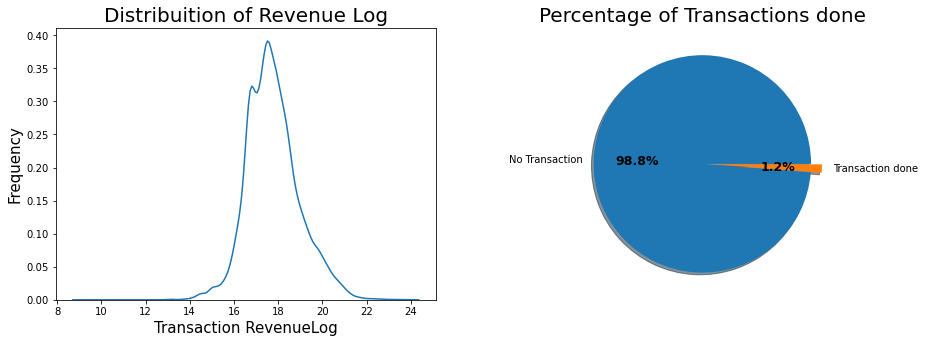

In [5]:
# converting to type 'float'
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')

# seting the figure size of our plots
fig = plt.figure(figsize=(15,5))
# creating a subplot grid of 1 x 2
plt.subplot(1,2,1)
# plotting log distribution of transactionRevenue; using values > 0 because log(0) is undefined
ax = sns.kdeplot(np.log(train_df["totals.transactionRevenue"][train_df['totals.transactionRevenue'] > 0]))
#seting the xlabel and size of font
ax.set_xlabel('Transaction RevenueLog', fontsize=15)
# seting the ylabel and size of font
ax.set_ylabel('Frequency', fontsize=15)
# seting the title and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20)

# setting the second plot of our grid
plt.subplot(1,2,2)
# grouping by transactionRevenue according to each customer
tmp = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
# setting all customers having transactionRevenue > 0 to 1
tmp.loc[tmp['totals.transactionRevenue']>0] = 1
# custom labels:- 0:No Transaction  1:Transaction done
mylabels = ['No Transaction', 'Transaction done']
# credits: https://stackoverflow.com/questions/57062322/python-how-to-change-autopct-text-to-white-and-bold-in-a-pie-chart
_, _, autopcts = plt.pie(tmp['totals.transactionRevenue'].value_counts(), explode=[0,0.1], labels=mylabels, autopct='%1.1f%%',
        shadow=True)
plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':12.5})
#seting the title and size of font
plt.title("Percentage of Transactions done", fontsize=20)

plt.show()

* **Observations:**
    1. We can see that the natural log of target variable(TransactionRevenue) follows gaussian distribution, which is good because we don't need to deal with unbalanced-target-problem.
    2. From the pie chart we can see that from all our customers only **1.2% have completed a transaction.**

In [87]:
train_df.columns.to_list()

['channelGrouping',
 'customDimensions',
 'date',
 'fullVisitorId',
 'hits',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.operatingSystem',
 'device.isMobile',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.networkDomain',
 'totals.hits',
 'totals.pageviews',
 'totals.sessionQualityDim',
 'totals.timeOnSite',
 'totals.transactions',
 'totals.transactionRevenue',
 'totals.totalTransactionRevenue',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword',
 'trafficSource.referralPath',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.page',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.adNetworkType']

## 2.2 Channel Grouping analysis

Text(0, 0.5, 'Transaction Revenue in Millions')

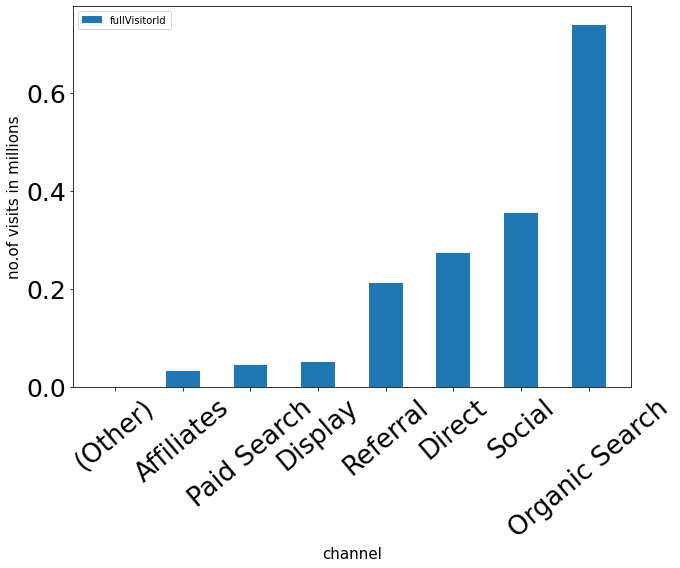

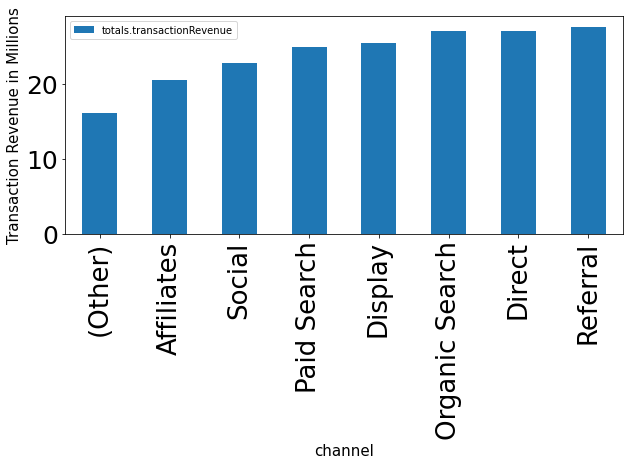

In [50]:
temp_1 = train_df.groupby('channelGrouping')['fullVisitorId'].count().reset_index() # counting no.of transactions in each group.

temp_2 = train_df.groupby("channelGrouping")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
                                                                                            # sum of all transactions


# for no.of visits in each channel plot: 
# --------------------------------

temp_1['fullVisitorId'] = (temp_1['fullVisitorId'])/(10**6)
temp_1.sort_values("fullVisitorId").plot(kind='bar',x='channelGrouping',y='fullVisitorId',figsize=(10,7))
plt.autoscale(True)
plt.xticks(rotation=40)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=26) # x- axis value's font size
plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in millions', fontsize=15) # y- axis label and font size


# for revenue in each channel plot: 
# --------------------------------

temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)

temp_2.sort_values("totals.transactionRevenue").plot(kind='bar',x='channelGrouping',y='totals.transactionRevenue',figsize=(10,4))
plt.xticks(rotation=90)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=26) # x- axis value's font size
plt.rc('ytick', labelsize=25) # y- axis value's font size

plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('Transaction Revenue in Millions', fontsize=15) # y- axis label and font size

In [39]:
tmp

,channelGrouping,totals.transactionRevenue
0,(Other),16.117095
1,Affiliates,20.578321
2,Direct,27.115726
3,Display,25.408072
4,Organic Search,27.013907
5,Paid Search,24.927490
6,Referral,27.627034
7,Social,22.720381


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


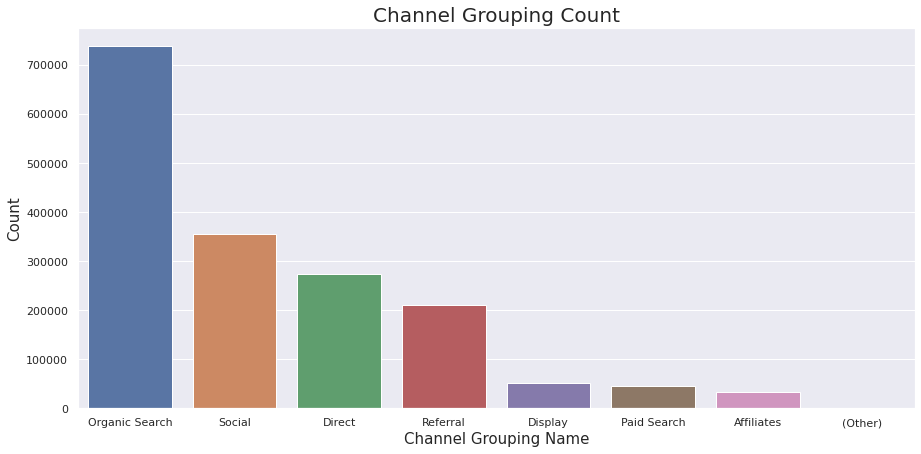

In [97]:
# seting the graph size
plt.figure(figsize=(15,7))

sns.countplot(train_df["channelGrouping"], order=train_df["channelGrouping"].value_counts().index)
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=15) # seting the x label size
plt.ylabel("Count", fontsize=15) # seting the y label size
plt.show() #use plt.show to render the graph that we did above




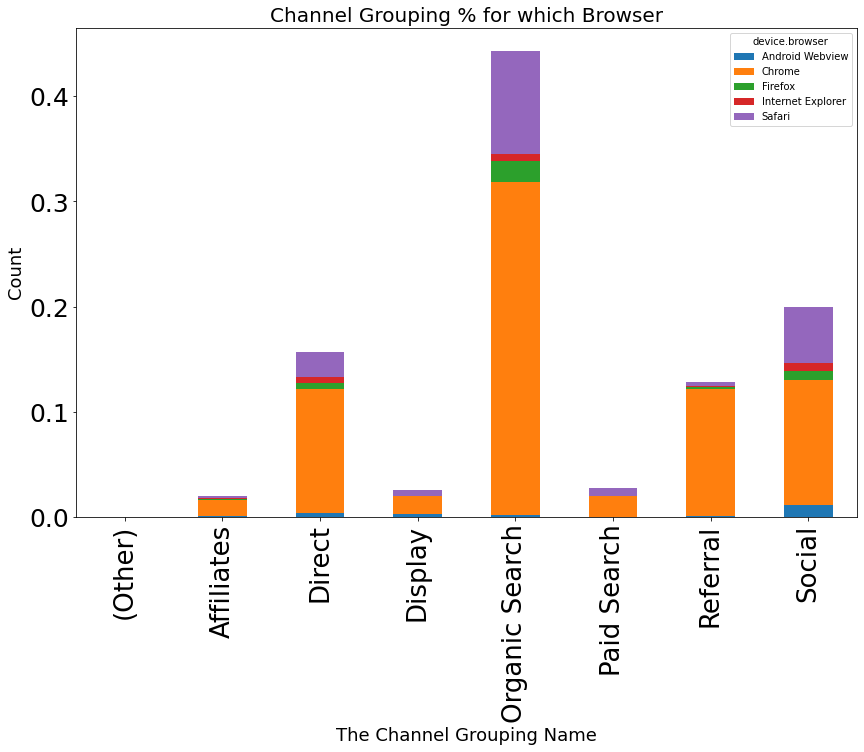

In [56]:
# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=train_df['channelGrouping'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=train_df[train_df['device.browser'].isin(train_df['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,9), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=90)
plt.show() # rendering

In [77]:
temp_2 = train_df.groupby("channelGrouping")["totals.transactionRevenue"].sum().reset_index() # for each channel we are taking
temp_2['totals.transactionRevenue'] = np.log1p(temp_2['totals.transactionRevenue']) # log(1 + revenue)
temp_2

,channelGrouping,totals.transactionRevenue
0,(Other),16.117095
1,Affiliates,20.578321
2,Direct,27.115726
3,Display,25.408072
4,Organic Search,27.013907
5,Paid Search,24.927490
6,Referral,27.627034
7,Social,22.720381


<AxesSubplot:xlabel='channelGrouping'>

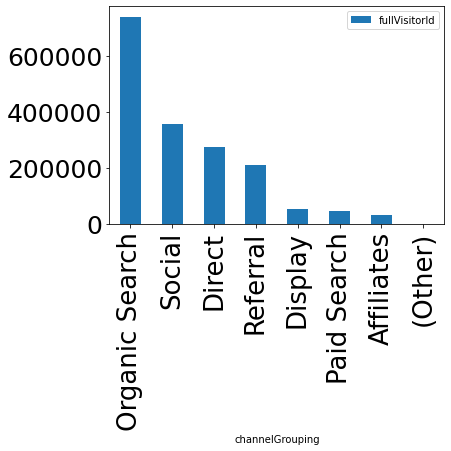

In [83]:
tmp = train_df.groupby('channelGrouping')['fullVisitorId'].count().reset_index()
tmp.sort_values('fullVisitorId', ascending=False).plot(kind='bar', x='channelGrouping', y='fullVisitorId')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Organic Search'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Direct'),
  Text(3, 0, 'Paid Search'),
  Text(4, 0, 'Display'),
  Text(5, 0, 'Social'),
  Text(6, 0, 'Affiliates'),
  Text(7, 0, '(Other)')])

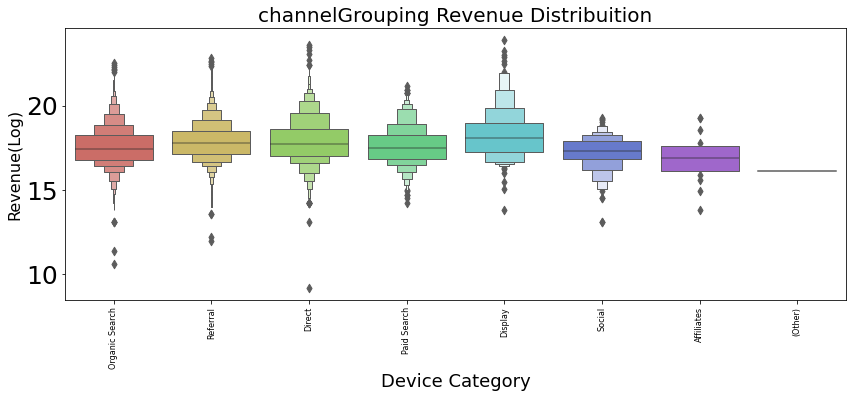

In [90]:
# seting the graph size
plt.figure(figsize=(14,5))

# plt.subplot(1,2,1)
# sns.countplot(train_df["channelGrouping"], palette="hls") # It's a module to count the category's
tmp = train_df.groupby('channelGrouping')['fullVisitorId'].count().reset_index()
tmp.sort_values('fullVisitorId', ascending=False).plot(kind='bar', x='channelGrouping', y='fullVisitorId')
plt.xticks(rotation=40)       # x- axis value names will rotate in 90 degrees
plt.rc('xtick', labelsize=26) # x- axis value's font size
plt.rc('ytick', labelsize=25) # y- axis value's font size
plt.xlabel('channel', fontsize=15)                         # x- axis label and font size
plt.ylabel('no.of visits in millions', fontsize=15) # y- axis label and font size

# plt.subplot(1,2,2)
sns.boxenplot(x="channelGrouping", y = np.log1p(train_df['totals.transactionRevenue']), 
              data=train_df[train_df['totals.transactionRevenue'] > 0], palette="hls") # It's a module to count the category's
plt.title("channelGrouping Revenue Distribuition", fontsize=20) # seting the title size
plt.xlabel("Device Category", fontsize=18) # seting the x label size
plt.ylabel("Revenue(Log)", fontsize=16) # seting the y label size
plt.xticks(fontsize=8, rotation=90) # Adjust the xticks, rotating the labels

# plt.subplots_adjust(hspace = 0.9, wspace = 0.5)
# type(ax)
# plt.show() #use plt.sho